## 一、准备数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

dftrain_raw = pd.read_csv('./data/titanic/train.csv')
dftest_raw = pd.read_csv('./data/titanic/test.csv')
dftrain_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
6,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
7,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
9,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


## 二、利用Pandas数据可视化 探索性数据分析EDA（Exploratory Data Analysis）
### survived(label)分布情况

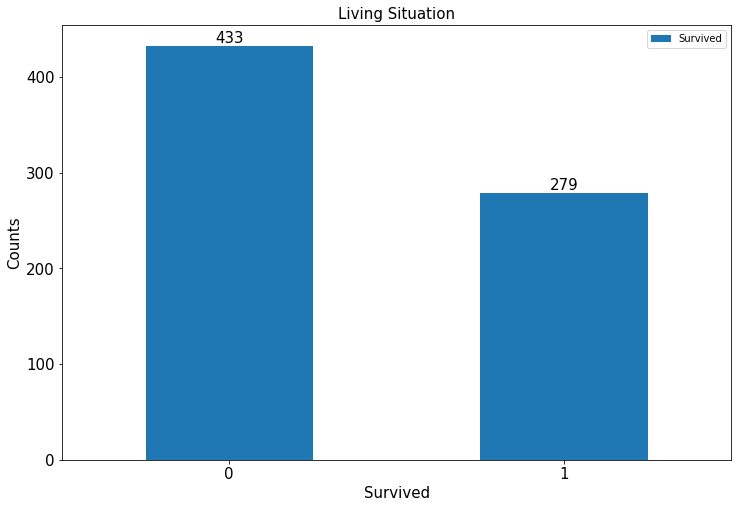

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

#ax = dftrain_raw['Survived'].value_counts().plot(kind='bar', figsize=(12, 8), fontsize=15, rot=0)
s = dftrain_raw['Survived'].value_counts() # series数组;类似于dict

ax = s.plot(kind='bar', figsize=(12, 8), fontsize=15, rot=0)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Survived', fontsize=15)

#设置图表标题
plt.title('Living Situation', fontsize=15)

#设置图例
ax.legend()

#设置数值标签
x = []
y = []
for key, value in s.items():
    x.append(key)
    y.append(value)
for a, b in zip(x, y): # list(zip(x, y)) = [(0, 433), (1, 279)]
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)

plt.show()

### 年龄分布情况

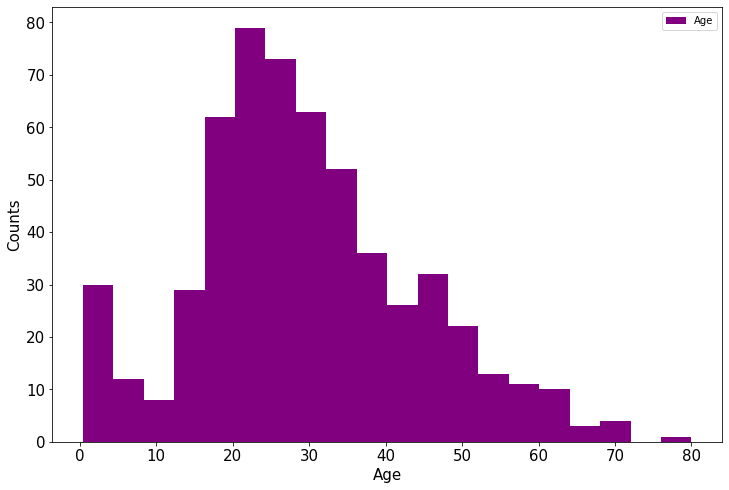

In [3]:
%matplotlib inline 
%config InlineBackend.figure_format = 'png'

ax = dftrain_raw['Age'].plot(kind = 'hist', bins = 20, color = 'purple', figsize = (12,8), fontsize=15) #直方图，bins为列数
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
ax.legend()
plt.show()

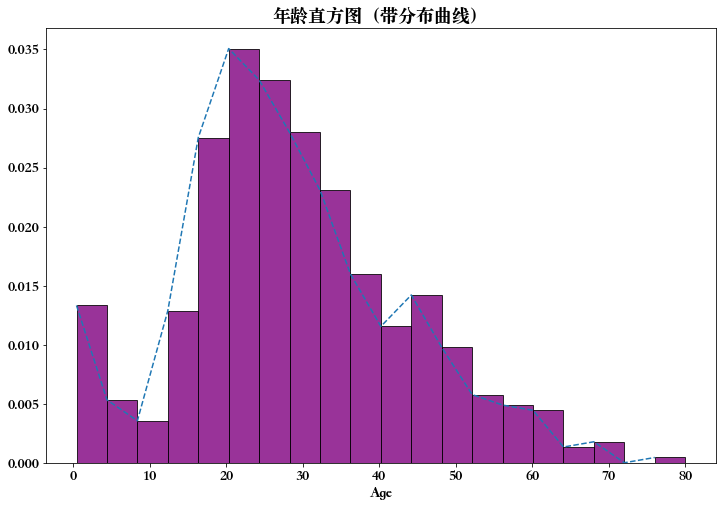

In [4]:
# 直方图添加分布曲线

%matplotlib inline 
%config InlineBackend.figure_format = 'png'

plt.rcParams['font.family'] = ['Songti SC'] #mac os下中文标题字体
plt.rcParams['font.size'] = 15

x = dftrain_raw['Age'] # <class 'pandas.core.series.Series'>

# 指定分组个数
num_bins = 20

fig, ax = plt.subplots()

# 绘图并接受返回值
n, bins_limits, patches = ax.hist(x, num_bins, density=1, color='purple', edgecolor='k', alpha=0.8, )
# 函数返回值 
# n: 一个数组，每组直方图的频数（或概率密度）<class 'numpy.ndarray'>
# bins: 一个数组，直方图的边界数值 <class 'numpy.ndarray'>
# patches: 一个对象组，每个对象代表直方图的矩形 <class 'matplotlib.cbook.silent_list'>

# 添加分布曲线
ax.plot(bins_limits[:num_bins], n, '--')

ax.set_xlabel('Age',fontsize = 15)
plt.title('年龄直方图（带分布曲线）')

fig = plt.gcf() # Get the current figure.
fig.set_size_inches(12, 8)
# fig.savefig('', dpi=100)

plt.show()

### label和年龄的相关性

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


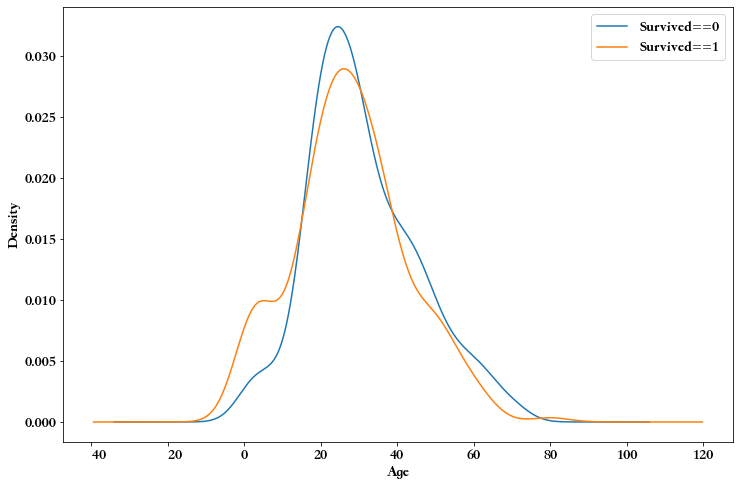

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density', figsize = (12, 8), fontsize = 15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density', figsize = (12, 8), fontsize = 15)

ax.legend(['Survived==0','Survived==1'],fontsize = 15)
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()